In [196]:
pip install geopandas

In [197]:
# Importation of the necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import geopandas as gpd

In [198]:
# Load Data into the notebook
Distribution_data = pd.read_csv('Documents/Net/ev_distribution_dataset.csv')
Geospatial_data = pd.read_csv('Documents/Net/geospatial_dataset.csv')
Weather_data = pd.read_csv('Documents/Net/weather_dataset.csv')

In [199]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Location,EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
1,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907
3,2020-01-22 17:00:00,Rural,Residential,554.336019,"(48.447826648452946, -71.98859080823637)",Type 2,Electric Scooter,Weekly,5,Substation_907
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,"(64.01943603679787, -129.53196438913122)",Type 2,Electric Car,Occasional,8,Substation_907


In [200]:
Geospatial_data.head()

,Substation_ID,Substation_Location,Transmission_Line_Capacity (MW)
0,Substation_907,"(57.25813554648914, -70.90582041775649)",40
1,Substation_218,"(70.02538473360673, -84.38057237161145)",71
2,Substation_339,"(80.39323542610704, -75.79784143914193)",85
3,Substation_773,"(49.12307771334813, -87.3598904388042)",10
4,Substation_349,"(66.79887060665365, -86.51124108848195)",40


In [201]:
Weather_data.head()

,Timestamp,Temperature (°C),Precipitation (mm),Weather_Conditions,Substation_ID
0,2020-01-03 11:00:00,28.865989,0.313611,Snowy,Substation_744
1,2020-01-03 17:00:00,28.902260,0.817728,Clear,Substation_516
2,2020-01-04 04:00:00,24.212651,4.516506,Clear,Substation_261
3,2020-01-04 23:00:00,29.024606,3.821278,Snowy,Substation_560
4,2020-01-05 00:00:00,24.126655,4.965771,Snowy,Substation_258


In [202]:
# Check for data type and missing values
Distribution_data.info()

# Describe of numerical columns
Distribution_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           500 non-null    object 
 1   Geographical_Area                   500 non-null    object 
 2   Customer_Type                       500 non-null    object 
 3   Electricity_Consumption (kWh)       500 non-null    float64
 4   EV_Charging_Station_Location        500 non-null    object 
 5   EV_Charging_Station_Specifications  500 non-null    object 
 6   EV_Type                             500 non-null    object 
 7   Charging_Habit                      500 non-null    object 
 8   Number_of_EVs                       500 non-null    int64  
 9   Substation_ID                       500 non-null    object 
dtypes: float64(1), int64(1), object(8)
memory usage: 39.2+ KB


,Electricity_Consumption (kWh),Number_of_EVs
count,500.000000,500.000000
mean,506.188554,5.240000
std,80.251238,2.577535
min,315.912577,1.000000
25%,439.978312,3.000000
50%,505.820872,5.000000
75%,557.230712,8.000000
max,718.980293,9.000000


In [203]:
# Check for data type and missing values
Geospatial_data.info()

# Describe of numerical columns
Geospatial_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 3 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   Substation_ID                    50 non-null     object
 1   Substation_Location              50 non-null     object
 2   Transmission_Line_Capacity (MW)  50 non-null     int64 
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


,Transmission_Line_Capacity (MW)
count,50.000000
mean,52.740000
std,24.857808
min,10.000000
25%,33.250000
50%,51.500000
75%,74.750000
max,94.000000


In [204]:
# Check for data type and missing values
Weather_data.info()

# Describe of numerical columns
Weather_data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97 entries, 0 to 96
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Timestamp           97 non-null     object 
 1   Temperature (°C)    97 non-null     float64
 2   Precipitation (mm)  97 non-null     float64
 3   Weather_Conditions  97 non-null     object 
 4   Substation_ID       97 non-null     object 
dtypes: float64(2), object(3)
memory usage: 3.9+ KB


,Temperature (°C),Precipitation (mm)
count,97.000000,97.000000
mean,25.311668,2.542096
std,4.821917,1.396957
min,12.449425,0.007923
25%,22.245088,1.390244
50%,25.248302,2.688862
75%,28.902260,3.656106
max,34.104493,4.965771


# Exploratory Data Analysis

## This Phase involve both Univariate and Bivariate Analysis

## Univariate Analysis
    1. Visualize the distribution of electricity consumption
    2. Analyze the distribution of EV types, charging habits, customer type

## Bivariate Analysis
    3. Use geospatial data to visualise the locations of substations and EV charging stations
    4. Analyze the capacity of transmission lines

## Univariate Analysis

C:\myanaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


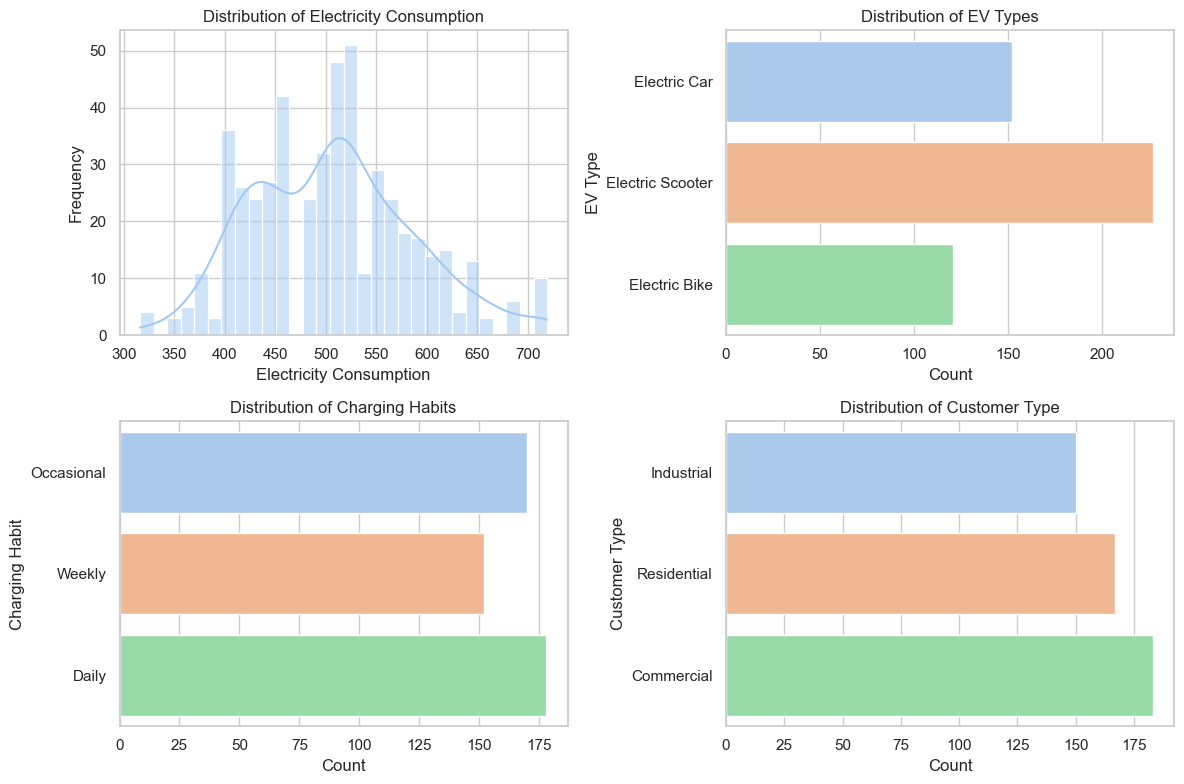

In [205]:
# Set the style and color palette of the plots
sns.set(style= "whitegrid")
sns.set_palette("pastel")

# Creat a 2x2 subplot grid
fig, axes = plt.subplots(2, 2, figsize= (12, 8))

# Plot distribution of electricity consumption
sns.histplot(data = Distribution_data, x= "Electricity_Consumption (kWh)", bins= 30, kde = True, ax=axes [0, 0])
axes[0, 0].set_title("Distribution of Electricity Consumption")
axes[0, 0].set_xlabel("Electricity Consumption")
axes[0, 0].set_ylabel("Frequency")

# Plot the distribution of EV types
sns.countplot(data= Distribution_data, y= "EV_Type", ax= axes[0, 1])
axes[0, 1].set_title("Distribution of EV Types")
axes[0, 1].set_xlabel("Count")
axes[0, 1].set_ylabel("EV Type")

# Plot the distribution of Charging Habits
sns.countplot(data= Distribution_data, y= "Charging_Habit", ax= axes[1, 0])
axes[1, 0].set_title("Distribution of Charging Habits")
axes[1, 0].set_xlabel("Count")
axes[1, 0].set_ylabel("Charging Habit")

# Plot the distribution of Customer Type
sns.countplot(data= Distribution_data, y= "Customer_Type", ax= axes[1, 1])
axes[1, 1].set_title("Distribution of Customer Type")
axes[1, 1].set_xlabel("Count")
axes[1, 1].set_ylabel("Customer Type")

# Adjust Layout
plt.tight_layout()

# Show the plots
plt.show()

## Bivariate Analysis

In [206]:
# Extract Lat and Long for EV charging stations
Distribution_data['ev_latitude'] = Distribution_data['EV_Charging_Station_Location'].apply(
    lambda x: float(x.split(",")[0].replace("(","").strip()))
Distribution_data['ev_longitude'] = Distribution_data['EV_Charging_Station_Location'].apply(
    lambda x: float(x.split(",")[1].replace(")","").strip()))

# Extract Lat and Long for substation Location
Geospatial_data['substation_latitude'] = Geospatial_data['Substation_Location'].apply(
    lambda x: float(x.split(",")[0].replace("(","").strip()))
Geospatial_data['substation_longitude'] = Geospatial_data['Substation_Location'].apply(
    lambda x: float(x.split(",")[1].replace(")","").strip()))

# Drop the original location columns to clean up the dataframe
Distribution_data = Distribution_data.drop(columns =['EV_Charging_Station_Location'])
Geospatial_data = Geospatial_data.drop(columns =['Substation_Location'])

In [207]:
Distribution_data.head()

,Timestamp,Geographical_Area,Customer_Type,Electricity_Consumption (kWh),EV_Charging_Station_Specifications,EV_Type,Charging_Habit,Number_of_EVs,Substation_ID,ev_latitude,ev_longitude
0,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
1,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
2,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964
3,2020-01-22 17:00:00,Rural,Residential,554.336019,Type 2,Electric Scooter,Weekly,5,Substation_907,48.447827,-71.988591
4,2020-01-10 18:00:00,Urban,Industrial,714.394409,Type 2,Electric Car,Occasional,8,Substation_907,64.019436,-129.531964


In [208]:
Geospatial_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude
0,Substation_907,40,57.258136,-70.905820
1,Substation_218,71,70.025385,-84.380572
2,Substation_339,85,80.393235,-75.797841
3,Substation_773,10,49.123078,-87.359890
4,Substation_349,40,66.798871,-86.511241


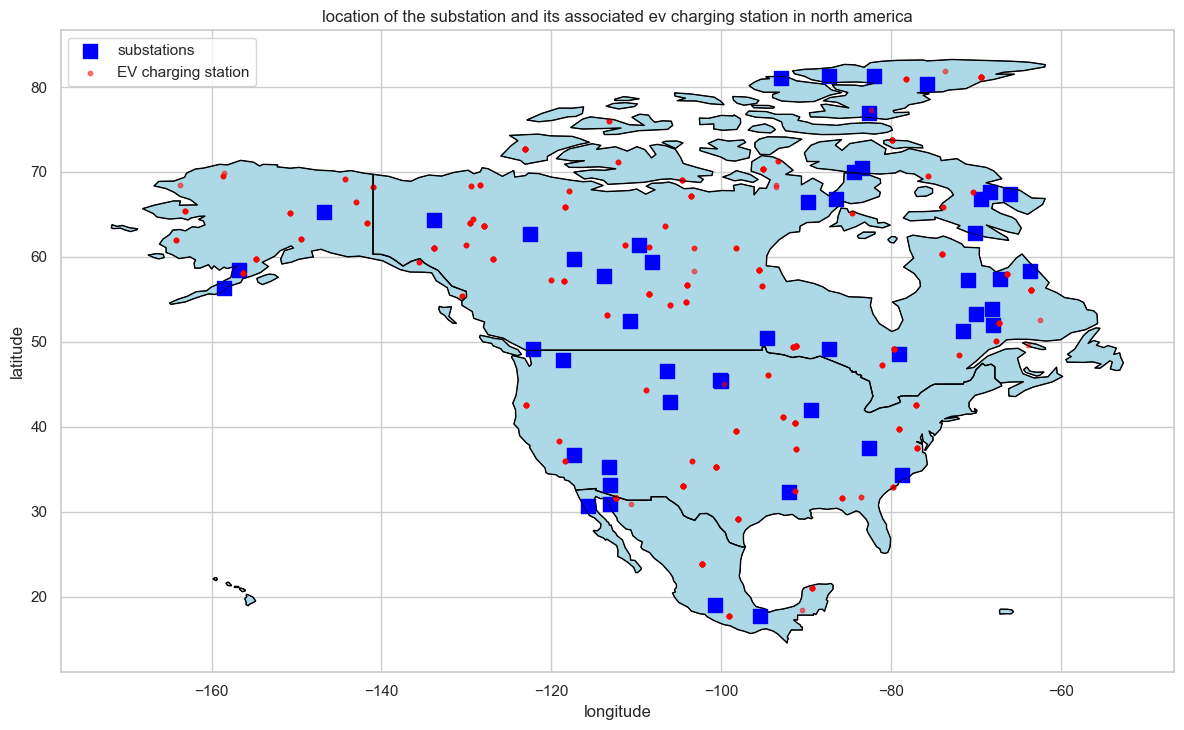

In [209]:
# Convert the dataframes to Geodataframes
ev_gdf = gpd.GeoDataFrame(Distribution_data,
                           geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_data,
                           geometry=gpd.points_from_xy(Geospatial_data.substation_longitude, Geospatial_data.substation_latitude))

# Load the world map data
world = gpd.read_file('Documents/Net/110m_cultural/ne_110m_admin_0_countries.shp')

# Filter the map to North America
#north_america = world[world['continent'] == "North America"]
north_america = world[world['SOVEREIGNT'].isin(['Canada', 'Mexico', 'United States of America'])]
# Plotting the map for north america
fig, ax = plt.subplots(figsize= (12, 8))
north_america.boundary.plot(ax=ax, linewidth= 0.5, color= 'black')
north_america.plot(ax=ax, color= 'lightblue', edgecolor= 'black')

# Plotting the substation on the map
substation_gdf.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substations')
# Plotting the ev charging station on the map
ev_gdf.plot(ax=ax, markersize = 10, color = 'red', label= 'EV charging station', alpha = 0.5)

# Set title and axis labels
plt.title('location of the substation and its associated ev charging station in north america')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.tight_layout()
plt.show()

In [217]:
world.head()

,featurecla,scalerank,LABELRANK,SOVEREIGNT,SOV_A3,ADM0_DIF,LEVEL,TYPE,TLC,ADMIN,...,FCLASS_TR,FCLASS_ID,FCLASS_PL,FCLASS_GR,FCLASS_IT,FCLASS_NL,FCLASS_SE,FCLASS_BD,FCLASS_UA,geometry
0,Admin-0 country,1,6,Fiji,FJI,0,2,Sovereign country,1,Fiji,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((180 -16.06713, 180 -16.55522, ..."
1,Admin-0 country,1,3,United Republic of Tanzania,TZA,0,2,Sovereign country,1,United Republic of Tanzania,...,None,None,None,None,None,None,None,None,None,"POLYGON ((33.90371 -0.95, 34.07262 -1.05982, 3..."
2,Admin-0 country,1,7,Western Sahara,SAH,0,2,Indeterminate,1,Western Sahara,...,Unrecognized,Unrecognized,Unrecognized,None,None,Unrecognized,None,None,None,"POLYGON ((-8.66559 27.65643, -8.66512 27.58948..."
3,Admin-0 country,1,2,Canada,CAN,0,2,Sovereign country,1,Canada,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -122.97421 49.0025..."
4,Admin-0 country,1,2,United States of America,US1,1,2,Country,1,United States of America,...,None,None,None,None,None,None,None,None,None,"MULTIPOLYGON (((-122.84 49, -120 49, -117.0312..."


In [211]:
from shapely.geometry import Point,LineString

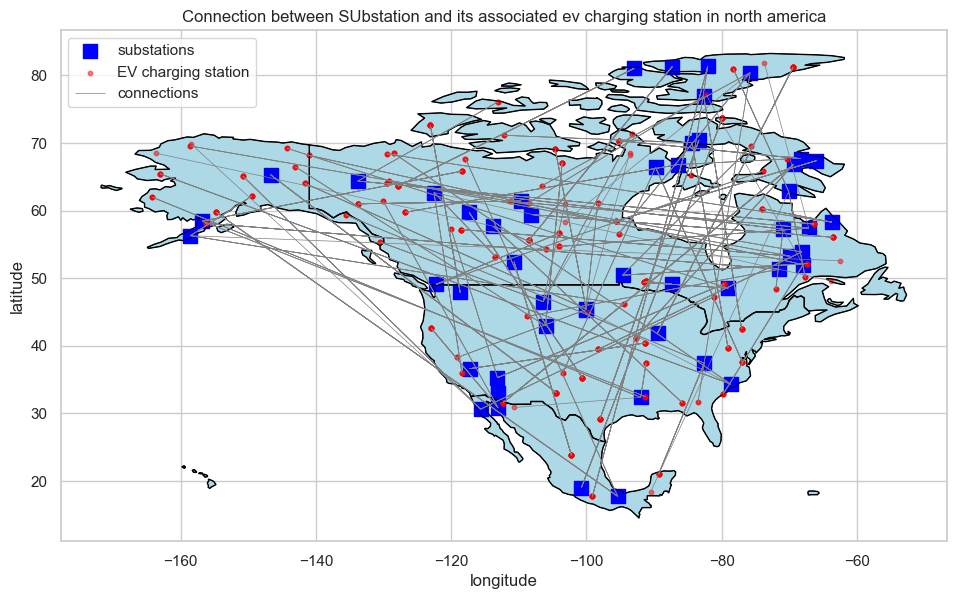

In [212]:
# Convert the dataframes to Geodataframes
ev_gdf = gpd.GeoDataFrame(Distribution_data,
                           geometry=gpd.points_from_xy(Distribution_data.ev_longitude, Distribution_data.ev_latitude))
substation_gdf = gpd.GeoDataFrame(Geospatial_data,
                           geometry=gpd.points_from_xy(Geospatial_data.substation_longitude, Geospatial_data.substation_latitude))

# Create lines connecting each substation to its associated ev charging stations
lines= []
for _, ev_row in Distribution_data.iterrows():
    substation = Geospatial_data[Geospatial_data['Substation_ID'] == ev_row['Substation_ID']].iloc[0]
    line= [(ev_row['ev_longitude'], ev_row['ev_latitude']),
          (substation['substation_longitude'], substation['substation_latitude'])]
    lines.append(line)

line_gdf = gpd.GeoDataFrame(geometry=[LineString(line) for line in lines])

# Load the world map data
world = gpd.read_file('Documents/Net/110m_cultural/ne_110m_admin_0_countries.shp')

# Filter the map to North America
#north_america = world[world['continent'] == "North America"]
north_america = world[world['SOVEREIGNT'].isin(['Canada', 'Mexico', 'United States of America'])]
# Plotting the map for north america
fig, ax = plt.subplots(figsize= (10, 6))
north_america.boundary.plot(ax=ax, linewidth= 0.5, color= 'black')
north_america.plot(ax=ax, color= 'lightblue', edgecolor= 'black')

# Plotting the substation on the map
substation_gdf.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substations')
# Plotting the ev charging station on the map
ev_gdf.plot(ax=ax, markersize = 10, color = 'red', label= 'EV charging station', alpha = 0.5)

# Ploting line
line_gdf.plot(ax=ax, linewidth= 0.5, color = 'gray', label= 'connections')

# Set title and axis labels
plt.title('Connection between SUbstation and its associated ev charging station in north america')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.tight_layout()
plt.show()

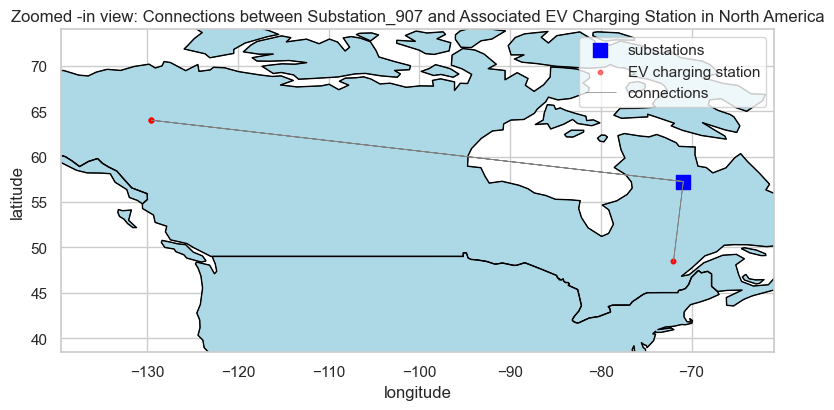

In [213]:
# Lets zoom in and see the connection of substation 1 to EVcharging stations

# Filter for the first substation
selected_substation = Geospatial_data.iloc[0]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert Geodataframes
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().T, 
    geometry=[Point(selected_substation['substation_longitude'], selected_substation['substation_latitude'])]
)

lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], 
                                               selected_substation['substation_longitude'],
                                               selected_substation['substation_latitude'])
                                            for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

# Load the world map data
world = gpd.read_file('Documents/Net/110m_cultural/ne_110m_admin_0_countries.shp')

# Filter the map to North America
north_america = world[world['SOVEREIGNT'].isin(['Canada', 'Mexico', 'United States of America'])]

# Determining the bounding box for the zoomed in area
buffer = 10 #degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for north america
fig, ax = plt.subplots(figsize= (8, 5))
north_america.boundary.plot(ax=ax, linewidth= 0.5, color= 'black')
north_america.plot(ax=ax, color= 'lightblue', edgecolor= 'black')

# Plotting the substation on the map
substation_gdf_selected.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substations')
# Plotting the ev charging station on the map
ev_gdf_selected.plot(ax=ax, markersize = 10, color = 'red', label= 'EV charging station', alpha = 0.5)

# Plotting line
line_gdf_selected.plot(ax=ax, linewidth= 0.5, color = 'gray', label= 'connections')

# Setting the zoom -in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set title and axis labels
plt.title(f'Zoomed -in view: Connections between {selected_substation["Substation_ID"]} and Associated EV Charging Station in North America')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.tight_layout()
plt.show()

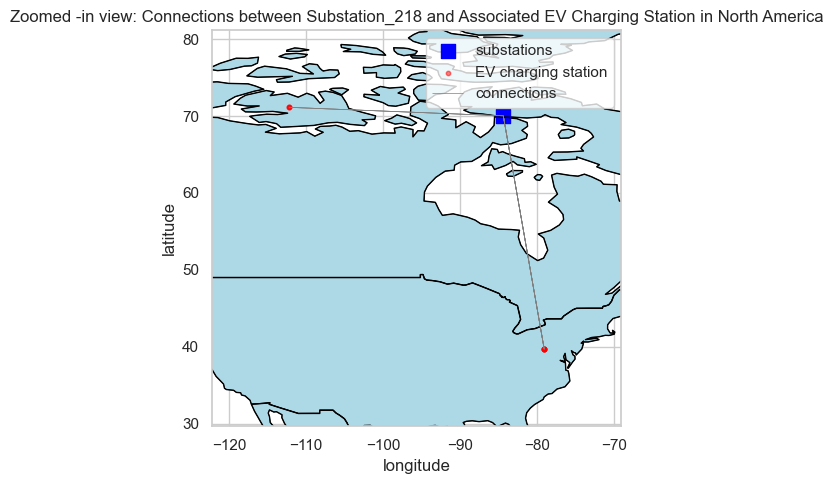

In [214]:
# Lets zoom in and see the connection of substation 1 to EVcharging stations

# Filter for the first substation
selected_substation = Geospatial_data.iloc[1]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert Geodataframes
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().T, 
    geometry=[Point(selected_substation['substation_longitude'], selected_substation['substation_latitude'])]
)

lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], 
                                               selected_substation['substation_longitude'],
                                               selected_substation['substation_latitude'])
                                            for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

# Load the world map data
world = gpd.read_file('Documents/Net/110m_cultural/ne_110m_admin_0_countries.shp')

# Filter the map to North America
north_america = world[world['SOVEREIGNT'].isin(['Canada', 'Mexico', 'United States of America'])]

# Determining the bounding box for the zoomed in area
buffer = 10 #degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for north america
fig, ax = plt.subplots(figsize= (8, 5))
north_america.boundary.plot(ax=ax, linewidth= 0.5, color= 'black')
north_america.plot(ax=ax, color= 'lightblue', edgecolor= 'black')

# Plotting the substation on the map
substation_gdf_selected.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substations')
# Plotting the ev charging station on the map
ev_gdf_selected.plot(ax=ax, markersize = 10, color = 'red', label= 'EV charging station', alpha = 0.5)

# Plotting line
line_gdf_selected.plot(ax=ax, linewidth= 0.5, color = 'gray', label= 'connections')

# Setting the zoom -in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set title and axis labels
plt.title(f'Zoomed -in view: Connections between {selected_substation["Substation_ID"]} and Associated EV Charging Station in North America')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.tight_layout()
plt.show()

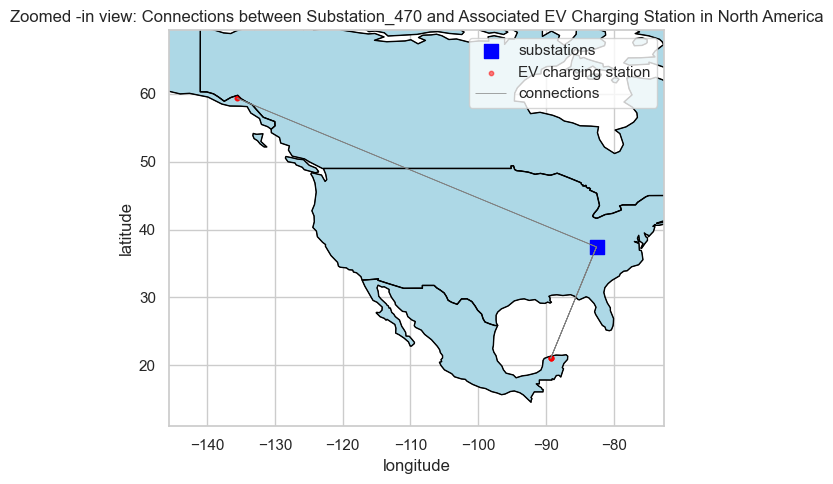

In [215]:
# Lets zoom in and see the connection of substation 1 to EVcharging stations

# Filter for the first substation
selected_substation = Geospatial_data.iloc[49]
associated_ev = Distribution_data[Distribution_data['Substation_ID'] == selected_substation['Substation_ID']]

# Convert Geodataframes
ev_gdf_selected = gpd.GeoDataFrame(associated_ev, geometry=gpd.points_from_xy(associated_ev.ev_longitude, associated_ev.ev_latitude))
substation_gdf_selected = gpd.GeoDataFrame(
    selected_substation.to_frame().T, 
    geometry=[Point(selected_substation['substation_longitude'], selected_substation['substation_latitude'])]
)

lines_selected = [(ev_row['ev_longitude'], ev_row['ev_latitude'], 
                                               selected_substation['substation_longitude'],
                                               selected_substation['substation_latitude'])
                                            for _, ev_row in associated_ev.iterrows()]
line_gdf_selected = gpd.GeoDataFrame(geometry=[LineString([(line[0], line[1]), (line[2], line[3])]) for line in lines_selected])

# Load the world map data
world = gpd.read_file('Documents/Net/110m_cultural/ne_110m_admin_0_countries.shp')

# Filter the map to North America
north_america = world[world['SOVEREIGNT'].isin(['Canada', 'Mexico', 'United States of America'])]

# Determining the bounding box for the zoomed in area
buffer = 10 #degrees
minx, miny, maxx, maxy = line_gdf_selected.total_bounds
xlim = [minx - buffer, maxx + buffer]
ylim = [miny - buffer, maxy + buffer]

# Plotting the map for north america
fig, ax = plt.subplots(figsize= (8, 5))
north_america.boundary.plot(ax=ax, linewidth= 0.5, color= 'black')
north_america.plot(ax=ax, color= 'lightblue', edgecolor= 'black')

# Plotting the substation on the map
substation_gdf_selected.plot(ax=ax, marker= 's', markersize = 100, color = 'blue', label= 'substations')
# Plotting the ev charging station on the map
ev_gdf_selected.plot(ax=ax, markersize = 10, color = 'red', label= 'EV charging station', alpha = 0.5)

# Plotting line
line_gdf_selected.plot(ax=ax, linewidth= 0.5, color = 'gray', label= 'connections')

# Setting the zoom -in limits
ax.set_xlim(xlim)
ax.set_ylim(ylim)

# Set title and axis labels
plt.title(f'Zoomed -in view: Connections between {selected_substation["Substation_ID"]} and Associated EV Charging Station in North America')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.tight_layout()
plt.show()

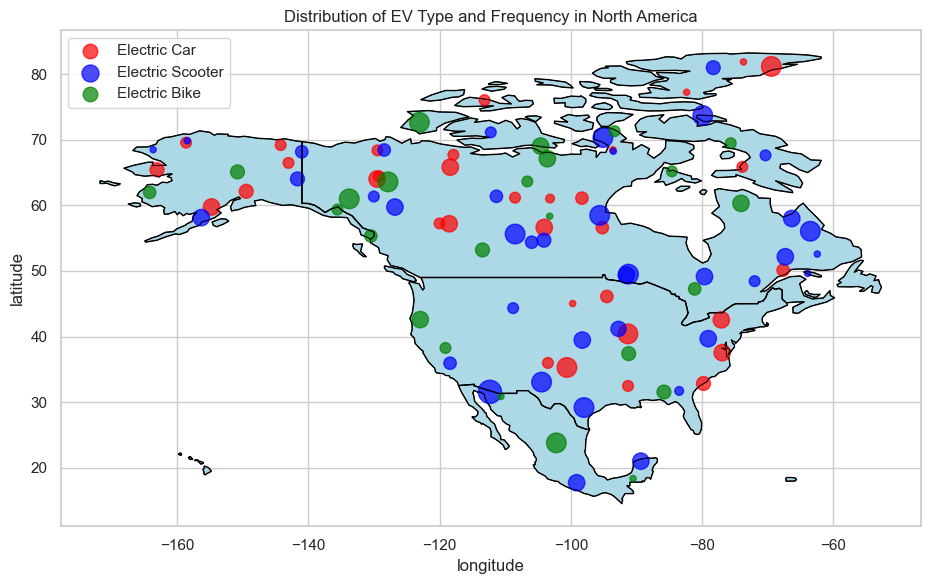

In [216]:
# Group by Location and the ev type, then count the number of stations
grouped_data = Distribution_data.groupby(['ev_longitude', 'ev_latitude', 'EV_Type']).size().reset_index(name='count')

# Convert grouped data to GeoDataFrame
grouped_gdf = gpd.GeoDataFrame(grouped_data,
                             geometry=gpd.points_from_xy(grouped_data.ev_longitude, grouped_data.ev_latitude))

# Load the world map data and filter for the North America
world = gpd.read_file('Documents/Net/110m_cultural/ne_110m_admin_0_countries.shp')
north_america = world[world['SOVEREIGNT'].isin(['Canada', 'Mexico', 'United States of America'])]

# Plotting with zoom
fig, ax = plt.subplots(figsize= (12, 6))
north_america.boundary.plot(ax=ax, linewidth= 0.5, color= 'black')
north_america.plot(ax=ax, color= 'lightblue', edgecolor= 'black')

# Define the colors of ev type
colors = {'Electric Car': 'red', 'Electric Scooter': 'blue', 'Electric Bike': 'green'}

# Plotting ev type
for ev_type, color in colors.items():
    sub_gdf = grouped_gdf[grouped_gdf['EV_Type'] == ev_type]
    sub_gdf.plot(ax=ax, markersize = sub_gdf['count']*20, color= color, label = ev_type, alpha= 0.7)

# Set title and axis labels
plt.title('Distribution of EV Type and Frequency in North America')
plt.xlabel('longitude')
plt.ylabel('latitude')
plt.legend()
plt.tight_layout()
plt.show()

### NETWORK CAPACITY ASSESSMENT 
    To perform network capacity assessment
    1. Calculate the total electricity consumption for each substation
    2. Compare the total electricity consumption with the transmission line capacity

In [223]:
# Grouping the ev distribution data by substation id and calculate the total electricity consumption for each substation
total_consumption_per_substation = Distribution_data.groupby('Substation_ID')['Electricity_Consumption (kWh)'].sum().reset_index()

# Merging the total consumption data with the geospatial data
network_capacity_data = pd.merge(Geospatial_data, total_consumption_per_substation, on= 'Substation_ID')

#  Rename the columns for better understanding
network_capacity_data.rename(columns = {'Electricity_Consumption (kWh)': 'Total_Consumption (kWh)'}, inplace = True)

# Calculating the ratio of total consumption to transmission line capacity
# Conversion: 1 MW = 1000 kWh

network_capacity_data['Consumption_to_Capacity_Ratio'] = network_capacity_data['Total_Consumption (kWh)'] / (network_capacity_data['Transmission_Line_Capacity (MW)']) * 1000


In [224]:
network_capacity_data.head()

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,166594.223006
1,Substation_218,71,70.025385,-84.380572,5997.437051,84470.944375
2,Substation_339,85,80.393235,-75.797841,4536.778685,53373.866881
3,Substation_773,10,49.123078,-87.359890,4426.337993,442633.799312
4,Substation_349,40,66.798871,-86.511241,4901.836555,122545.913887


In [225]:
from shapely.geometry import Point

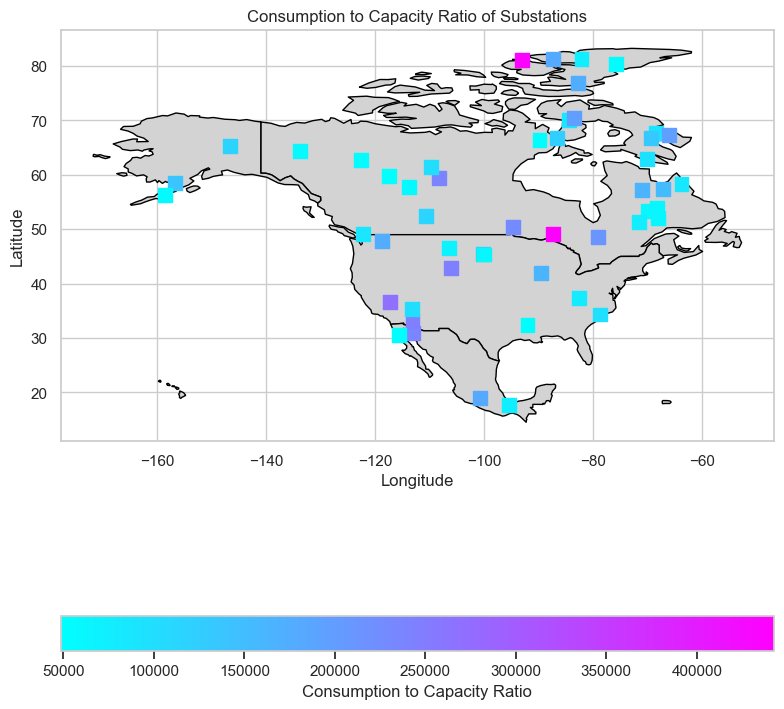

In [247]:
# Create the Geodataframe for the network capacity for the dataframes
geometry_network_capacity = [Point(lon, lat) for lon, lat in zip(network_capacity_data['substation_longitude'], network_capacity_data['substation_latitude'])]
gdf_network_capacity = gpd.GeoDataFrame(network_capacity_data, geometry=geometry_network_capacity)

# Plotting in choropleth style
fig, ax = plt.subplots(figsize = (8, 12))
north_america.plot(ax=ax, color = 'lightgray', edgecolor = 'black')
gdf_network_capacity.plot(
    column= 'Consumption_to_Capacity_Ratio',
    cmap= 'cool',
    legend= True,
    marker= 's', 
    markersize= 100, ax= ax, legend_kwds= {'label': "Consumption to Capacity Ratio", 'orientation': "horizontal"})

ax.set_title("Consumption to Capacity Ratio of Substations")
ax.set_xlabel("Longitude")
ax.set_ylabel("Latitude")
plt.tight_layout()
plt.show()

In [250]:
# Group by the substation_id for the number of evs
ev_counts = Distribution_data.groupby('Substation_ID')['Number_of_EVs'].sum().reset_index()

# Merge network capacity data with ev counts
final_data = pd.merge(ev_counts, network_capacity_data, on= 'Substation_ID')

# CORRELATION
correlation_ratio = final_data['Number_of_EVs'].corr(final_data['Consumption_to_Capacity_Ratio'])


In [251]:
correlation_ratio

-0.10944923035990639

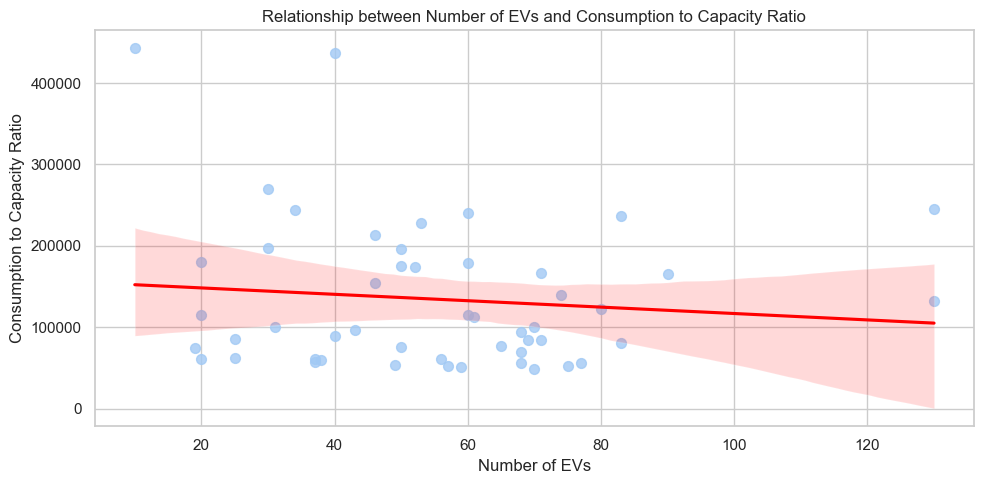

In [257]:
# Scattered plot with regression line
plt.figure(figsize =(10,5))
sns.regplot(x= 'Number_of_EVs', y= 'Consumption_to_Capacity_Ratio', data= final_data, scatter_kws={'s':50}, line_kws= {'color': 'red'})
plt.title('Relationship between Number of EVs and Consumption to Capacity Ratio')
plt.xlabel('Number of EVs')
plt.ylabel('Consumption to Capacity Ratio')
plt.grid(True)
plt.tight_layout()
plt.show()

## Identifying Bottlenecks
*    By analyzing the map, we can identify the substations and areas that are potential bottlenecks in the distribution network. These are the areas where the `Consumption_to_Capacity_Ratio` is high

In [271]:
# Filtering c2c greater than 1
bottleneck_substation = network_capacity_data[network_capacity_data['Consumption_to_Capacity_Ratio']>= 0.9]

In [272]:
bottleneck_substation

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
0,Substation_907,40,57.258136,-70.905820,6663.768920,166594.223006
1,Substation_218,71,70.025385,-84.380572,5997.437051,84470.944375
2,Substation_339,85,80.393235,-75.797841,4536.778685,53373.866881
3,Substation_773,10,49.123078,-87.359890,4426.337993,442633.799312
4,Substation_349,40,66.798871,-86.511241,4901.836555,122545.913887
5,Substation_752,33,81.295968,-87.304226,5935.678393,179869.042217
6,Substation_294,35,52.421521,-110.699042,4010.395180,114582.719421
7,Substation_301,20,30.873564,-113.079468,4738.530994,236926.549716
8,Substation_443,60,62.832107,-70.090111,5673.039047,94550.650787
9,Substation_996,65,81.330310,-82.055755,4941.446087,76022.247485


## Optimizing Network Upgrades:
   For optimizing network upgrades, focus on substations with potential to have high `Consumption_to_Capacity_Ratio` Upgrading the transmission lines or adding additional capacity in these areas can help in managing the potential to have increased load effectively and ensuring grid reliability
    Additionally, lets note from te analysis:
*     The Geographical distribution of EV charging stations; where EV charging stations are quite far from the Substation
Also, let the business look into:
*     Potential future growth in EV adoption in different areas.
*     Costs associated with different upgrade options

In [273]:
top_5_substations = network_capacity_data.nlargest(5, 'Consumption_to_Capacity_Ratio')
top_5_substations

,Substation_ID,Transmission_Line_Capacity (MW),substation_latitude,substation_longitude,Total_Consumption (kWh),Consumption_to_Capacity_Ratio
3,Substation_773,10,49.123078,-87.359890,4426.337993,442633.799312
14,Substation_87,12,81.031814,-92.941747,5243.800714,436983.392814
27,Substation_711,17,36.618181,-117.277556,4579.354677,269373.804543
20,Substation_11,43,33.082269,-113.118931,10534.827701,244995.993052
42,Substation_258,22,42.952789,-106.049333,5378.214378,244464.289910


## Correlation with Weather Data
*  Analyzing the corellation between weather data and electricity consumption can provide insight into how weather conditions affect the distribution

In [276]:
# Merge weather data with distribution data
merged_data = pd.merge(Distribution_data, Weather_data, on= ['Timestamp', 'Substation_ID'])

# Calculate the correlation between weather condition and electricity consumption
correlation_matrix = merged_data[['Electricity_Consumption (kWh)', 'Temperature (°C)', 'Precipitation (mm)']].corr()

# Display
correlation_matrix

,Electricity_Consumption (kWh),Temperature (°C),Precipitation (mm)
Electricity_Consumption (kWh),1.000000,0.131543,0.085014
Temperature (°C),0.131543,1.000000,-0.005828
Precipitation (mm),0.085014,-0.005828,1.000000


<function matplotlib.pyplot.show(close=None, block=None)>

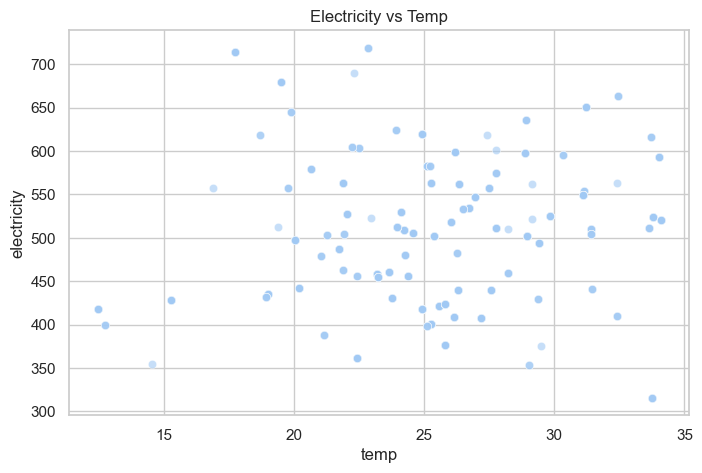

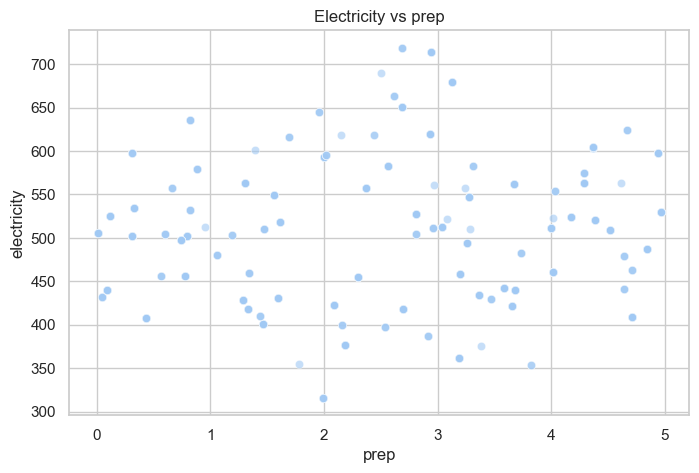

In [280]:
# Electricity consumption vs temp
plt.figure(figsize= (8,5))
sns.scatterplot(data= merged_data, x="Temperature (°C)", y="Electricity_Consumption (kWh)", alpha= 0.6)
plt.title("Electricity vs Temp")
plt.xlabel("temp")
plt.ylabel("electricity")
plt.show

# Electricity vs precipitation
plt.figure(figsize= (8,5))
sns.scatterplot(data= merged_data, x="Precipitation (mm)", y="Electricity_Consumption (kWh)", alpha= 0.6)
plt.title("Electricity vs prep")
plt.xlabel("prep")
plt.ylabel("electricity")
plt.show

## Insights
1. Electricity Consumption: The electricity consumption is mostly centered around 500 KWh, with certain instances of higher consumption. This indicates demand at different times and locations.


2. EV Types and Charging Habits: Electric scooters is the most common types of EVs. Most customers charge their EVs daily, indicating a consistent daily load on the distribution network. 
3. Consumer Type: Most Customers are commercial consumers.
4. Geospatial Distribution: The spatial distribution of substations and EV charging stations is widespread.
5. Geospatial Distribution: The EV charging station seems to be to far from it's corresponding Substation.
6. Network Capacity: Some substations have a high `Consumption_to_Capacity_Ratio`, indicating potential bottlenecks and overloads in the network. There is also no correlation with the number of EVs per substation and the Consumption to Capacity Ratio, this shows that Number of EVs is not a factor for overload.
7. Weather Correlation: The correlaation between weather conditions (temperature and precipitation) and electricty consumption is weak in the current dataset, suggesting that other factors might be more influential in affecting electricity consumption.

## The Optimization Strategy/Recommendation
### This is based on the analysis done and the business problems at hand, all these should be incorporated into the business.
1. **Priotize Substation Upgrades**: Priotize upgrades at substations where the `Consumption_to_Capacity_Ratio` is high, indicating potential overloads. Upgrade the transmission lines because the EV Charging Stations are too far from their correspoding Substations.
2. **Geospatial Analysis for Upgrade Planning**: Use geospatial analysis to determine the optional locations for new substations or upgrades to exixting ones. Consider factors like the proximity to high load demand areas (areas with high consumption to capacity ratio) and geographical constraints.
3. **Demand Side Management**: Implement demand-side management strategies to balance the load on the grid. Encourage customers to charge their EVs during off-peak hours through incentives or dynamic pricing.
4. **Advanced Monitoring and Analysis**: Deploy advanced monitoring systems to continuously monitor the health and perfomance of the distribution network. Use analytics to predict potential issues and take preventive action.
5. **Cost-Benefit Analysis**: Conduct a comprehensive cost-benefit analysis for different upgrade options. Consider factors like the cost of upgrades, operational costs, potential revenue from increased capacity, and the impact on service reliability and customer satisfaction.
6. **Customer Engagement**: Engage with customers to understand their needs and expectations. Provide clear communiccation about network upgrades and how they will enhance service reliability and meet the growing demand for EV charging.
7. **Continuous Improvement**: Continuously monitor and assess the perfomance of the distribution network. Gather feedback from customers and other stakeholders, and use this feedback to make further implovements and optimizations.

By following these steps. PowerCharge Utilities can develop an effective optimization strategy to manage the increased load demand from EV charging stations, ensure the reliability and resilience of the distribution network, and meet the expectations of customers, all while optimizing costs and ensuring regulatory compliance.